In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set_style("dark")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/Latest_Data_Science_Salaries.csv")

In [3]:
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020
3296,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Large,2021
3297,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Small,2020
3298,Business Data Analyst,Contract,Entry,Junior,100000,United States Dollar,United States,100000,United States,Large,2020


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [5]:
df.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

count    3.300000e+03
mean     2.046623e+05
std      7.279383e+05
min      1.400000e+04
25%      9.416900e+04
50%      1.400000e+05
75%      1.900000e+05
max      3.040000e+07
Name: Salary, dtype: float64


/tmp/ipykernel_20/688042092.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'], color='g', bins=10, hist_kws={'alpha': 0.4});


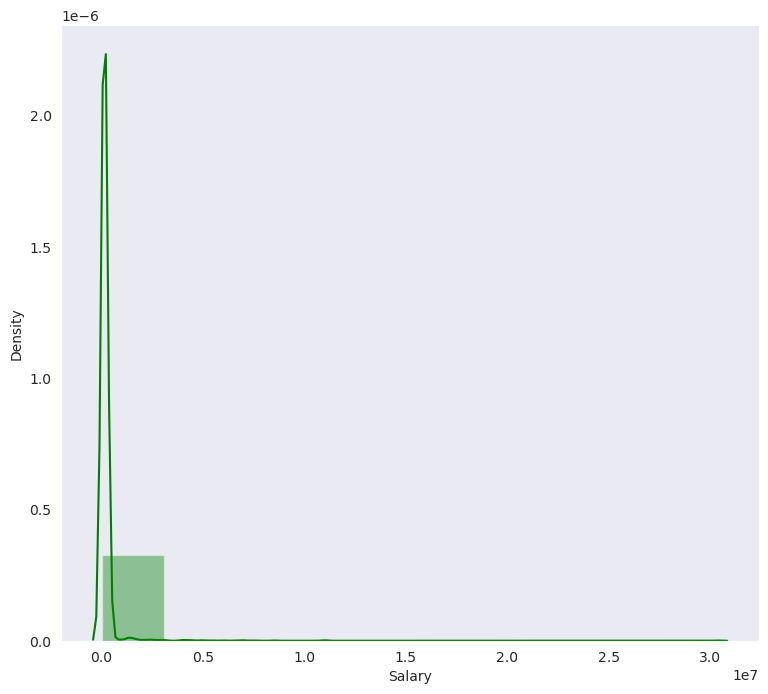

In [6]:
print(df['Salary'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Salary'], color='g', bins=10, hist_kws={'alpha': 0.4});

In [7]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [8]:
import numpy as np

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Salary,Salary in USD,Year
0,210000,210000,2023
1,165000,165000,2023
2,185900,185900,2023
3,129300,129300,2023
4,140000,140000,2023


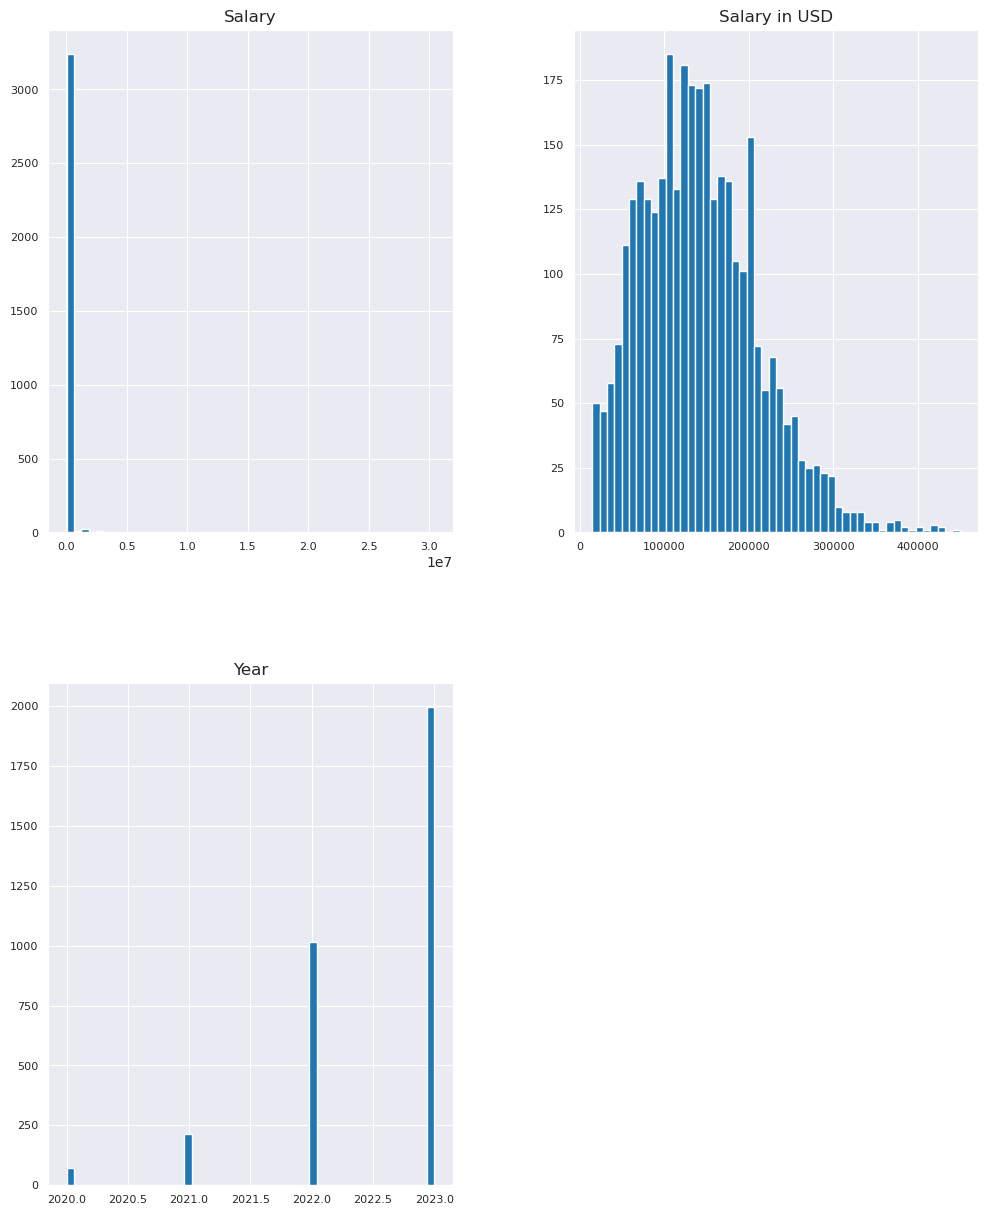

In [10]:
df_num.hist(figsize=(12, 15), bins=50, xlabelsize=8, ylabelsize=8);

<Axes: >

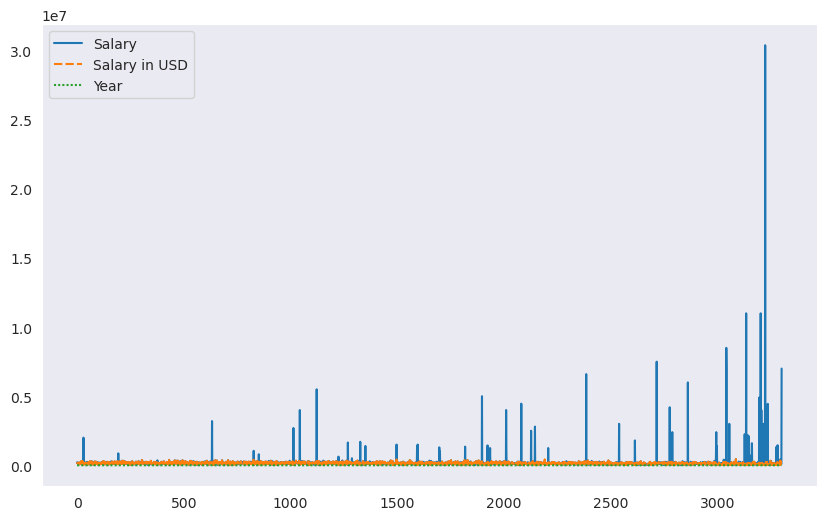

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df)

<Axes: xlabel='Job Title', ylabel='Salary'>

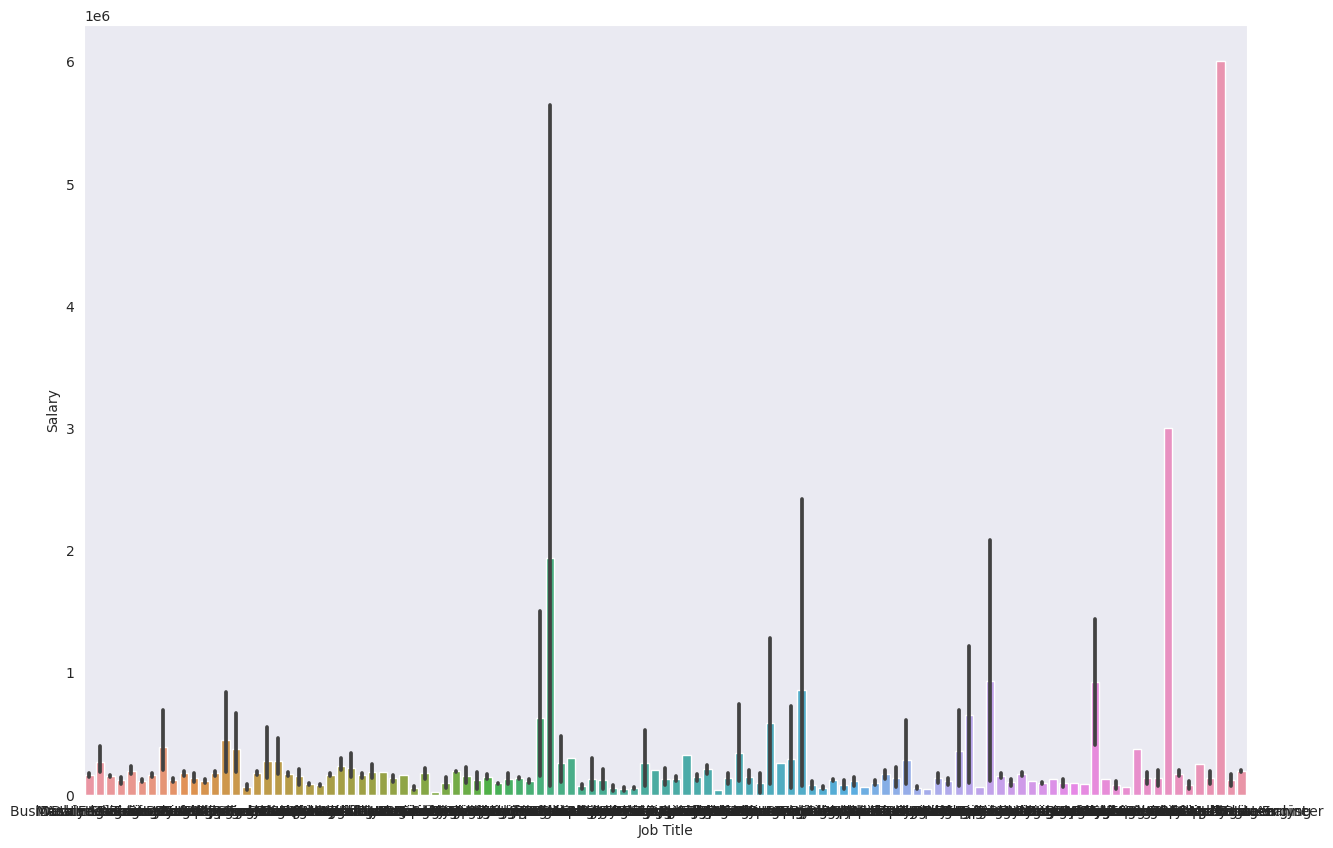

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Job Title'], y=df['Salary'])

<Axes: xlabel='Salary', ylabel='Job Title'>

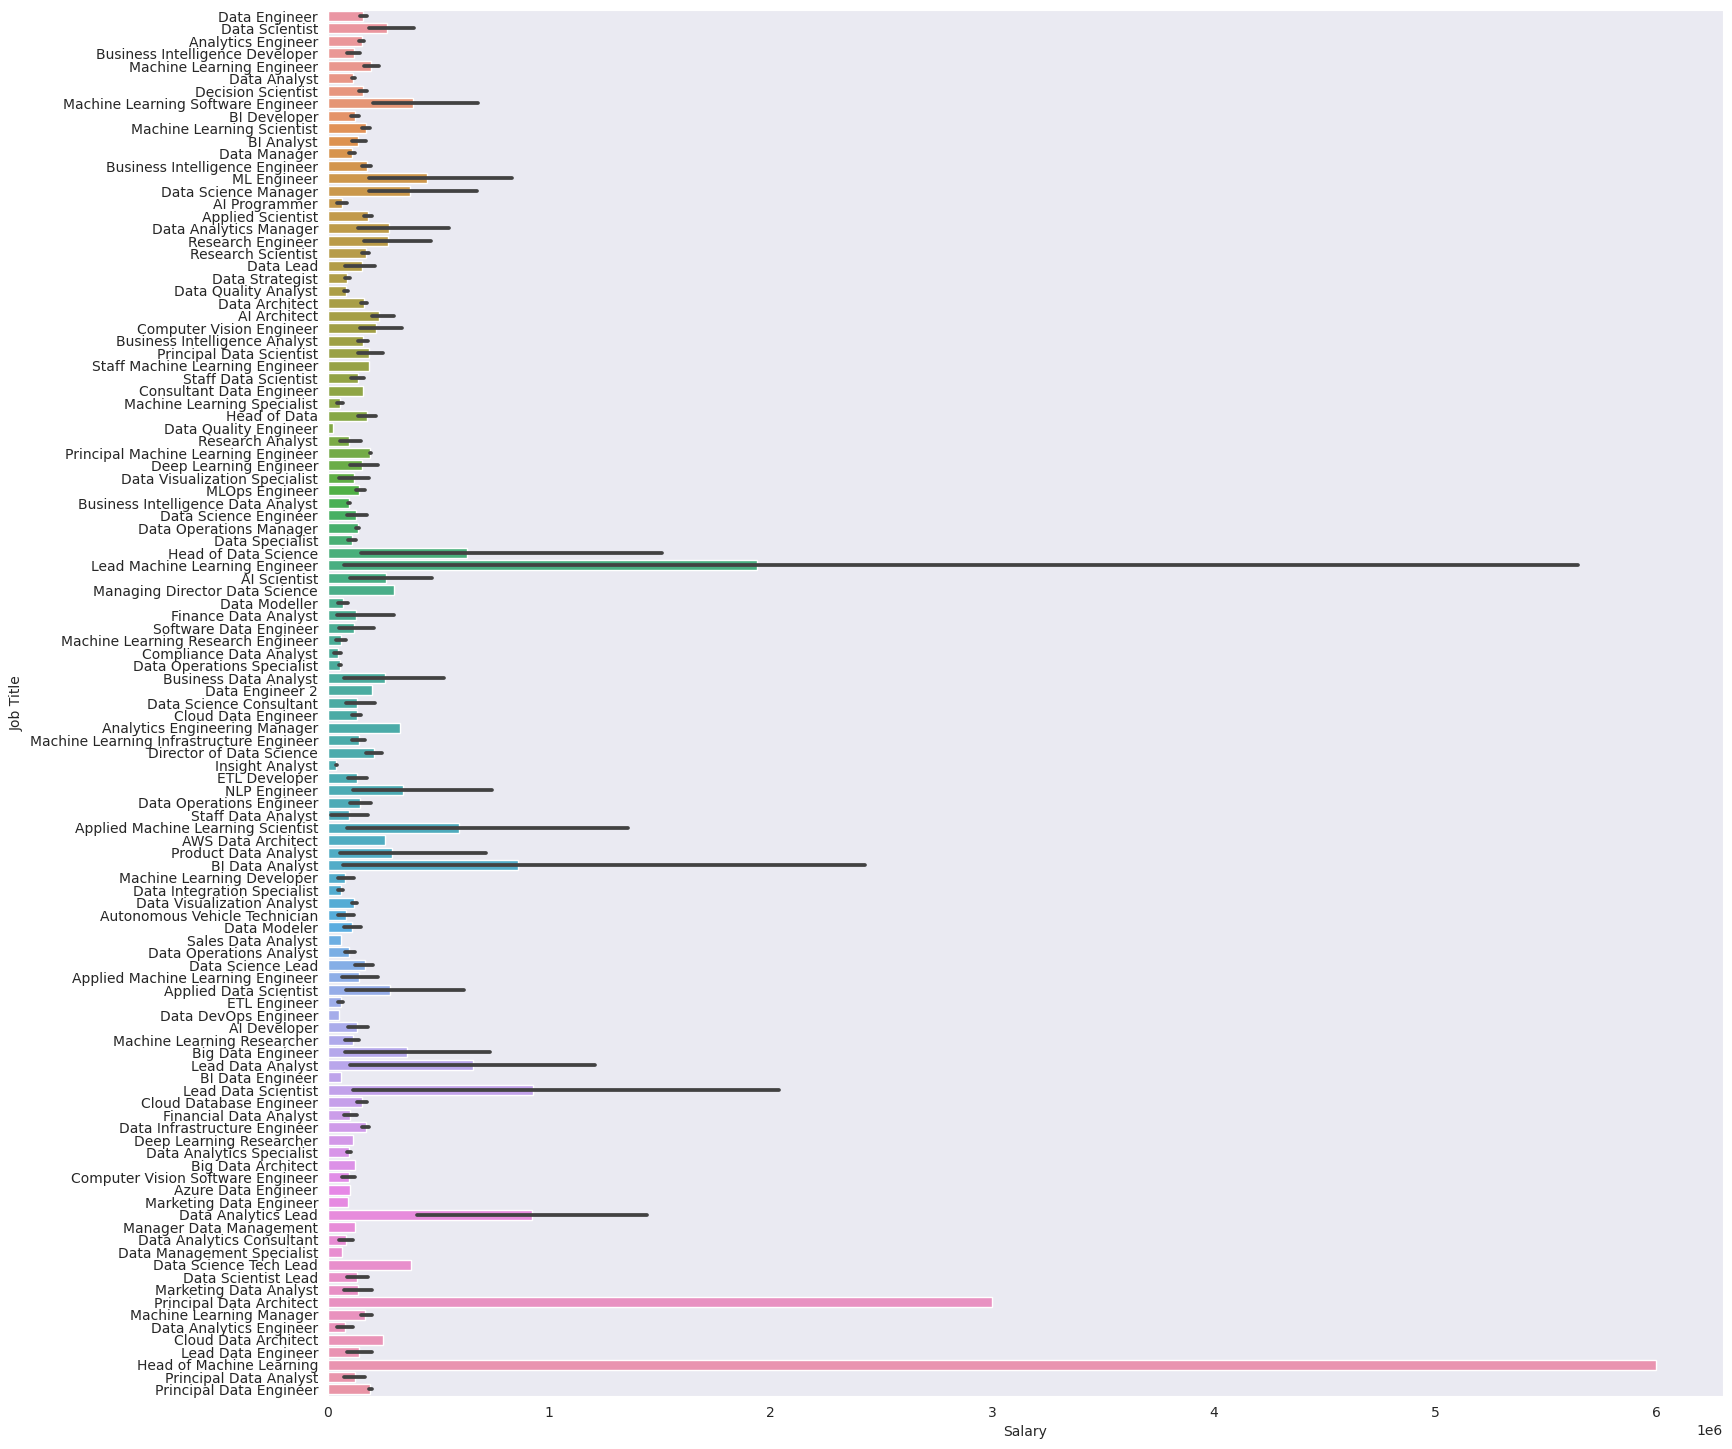

In [13]:
plt.figure(figsize=(18,18))
sns.barplot(x=df['Salary'], y=df['Job Title'])

<Axes: xlabel='Experience Level', ylabel='Salary'>

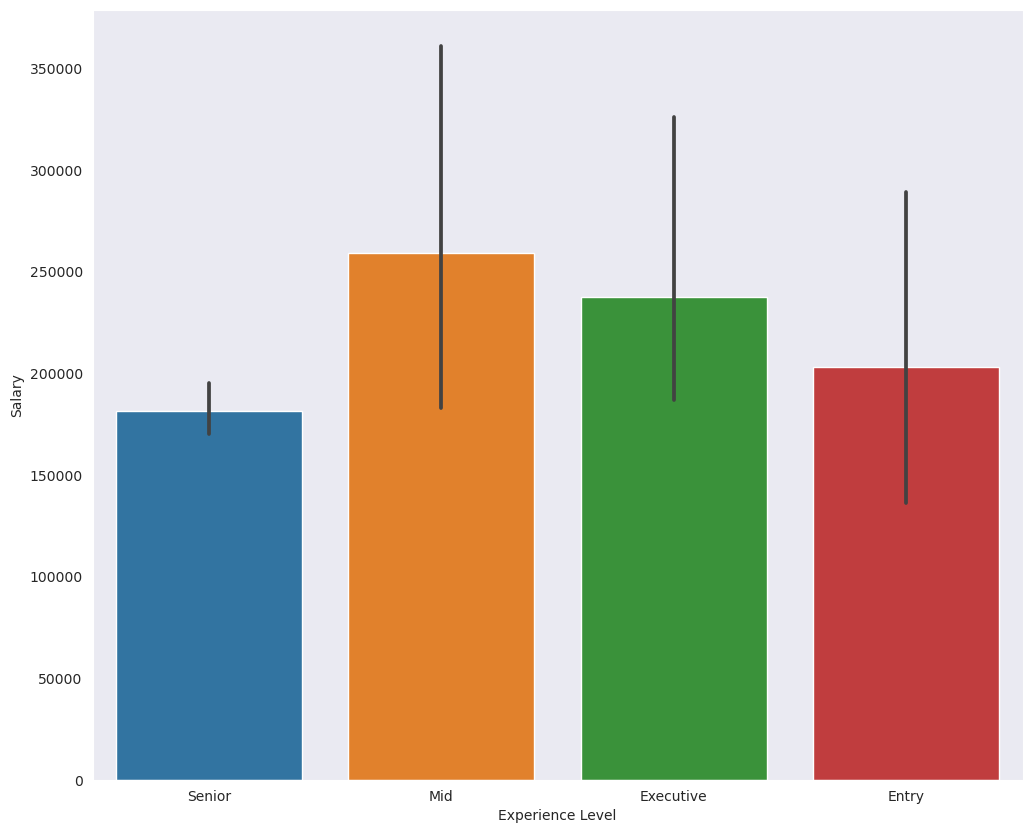

In [14]:
plt.figure(figsize=(12,10))
sns.barplot(x=df['Experience Level'], y=df['Salary'])

<Axes: xlabel='Salary', ylabel='Employee Residence'>

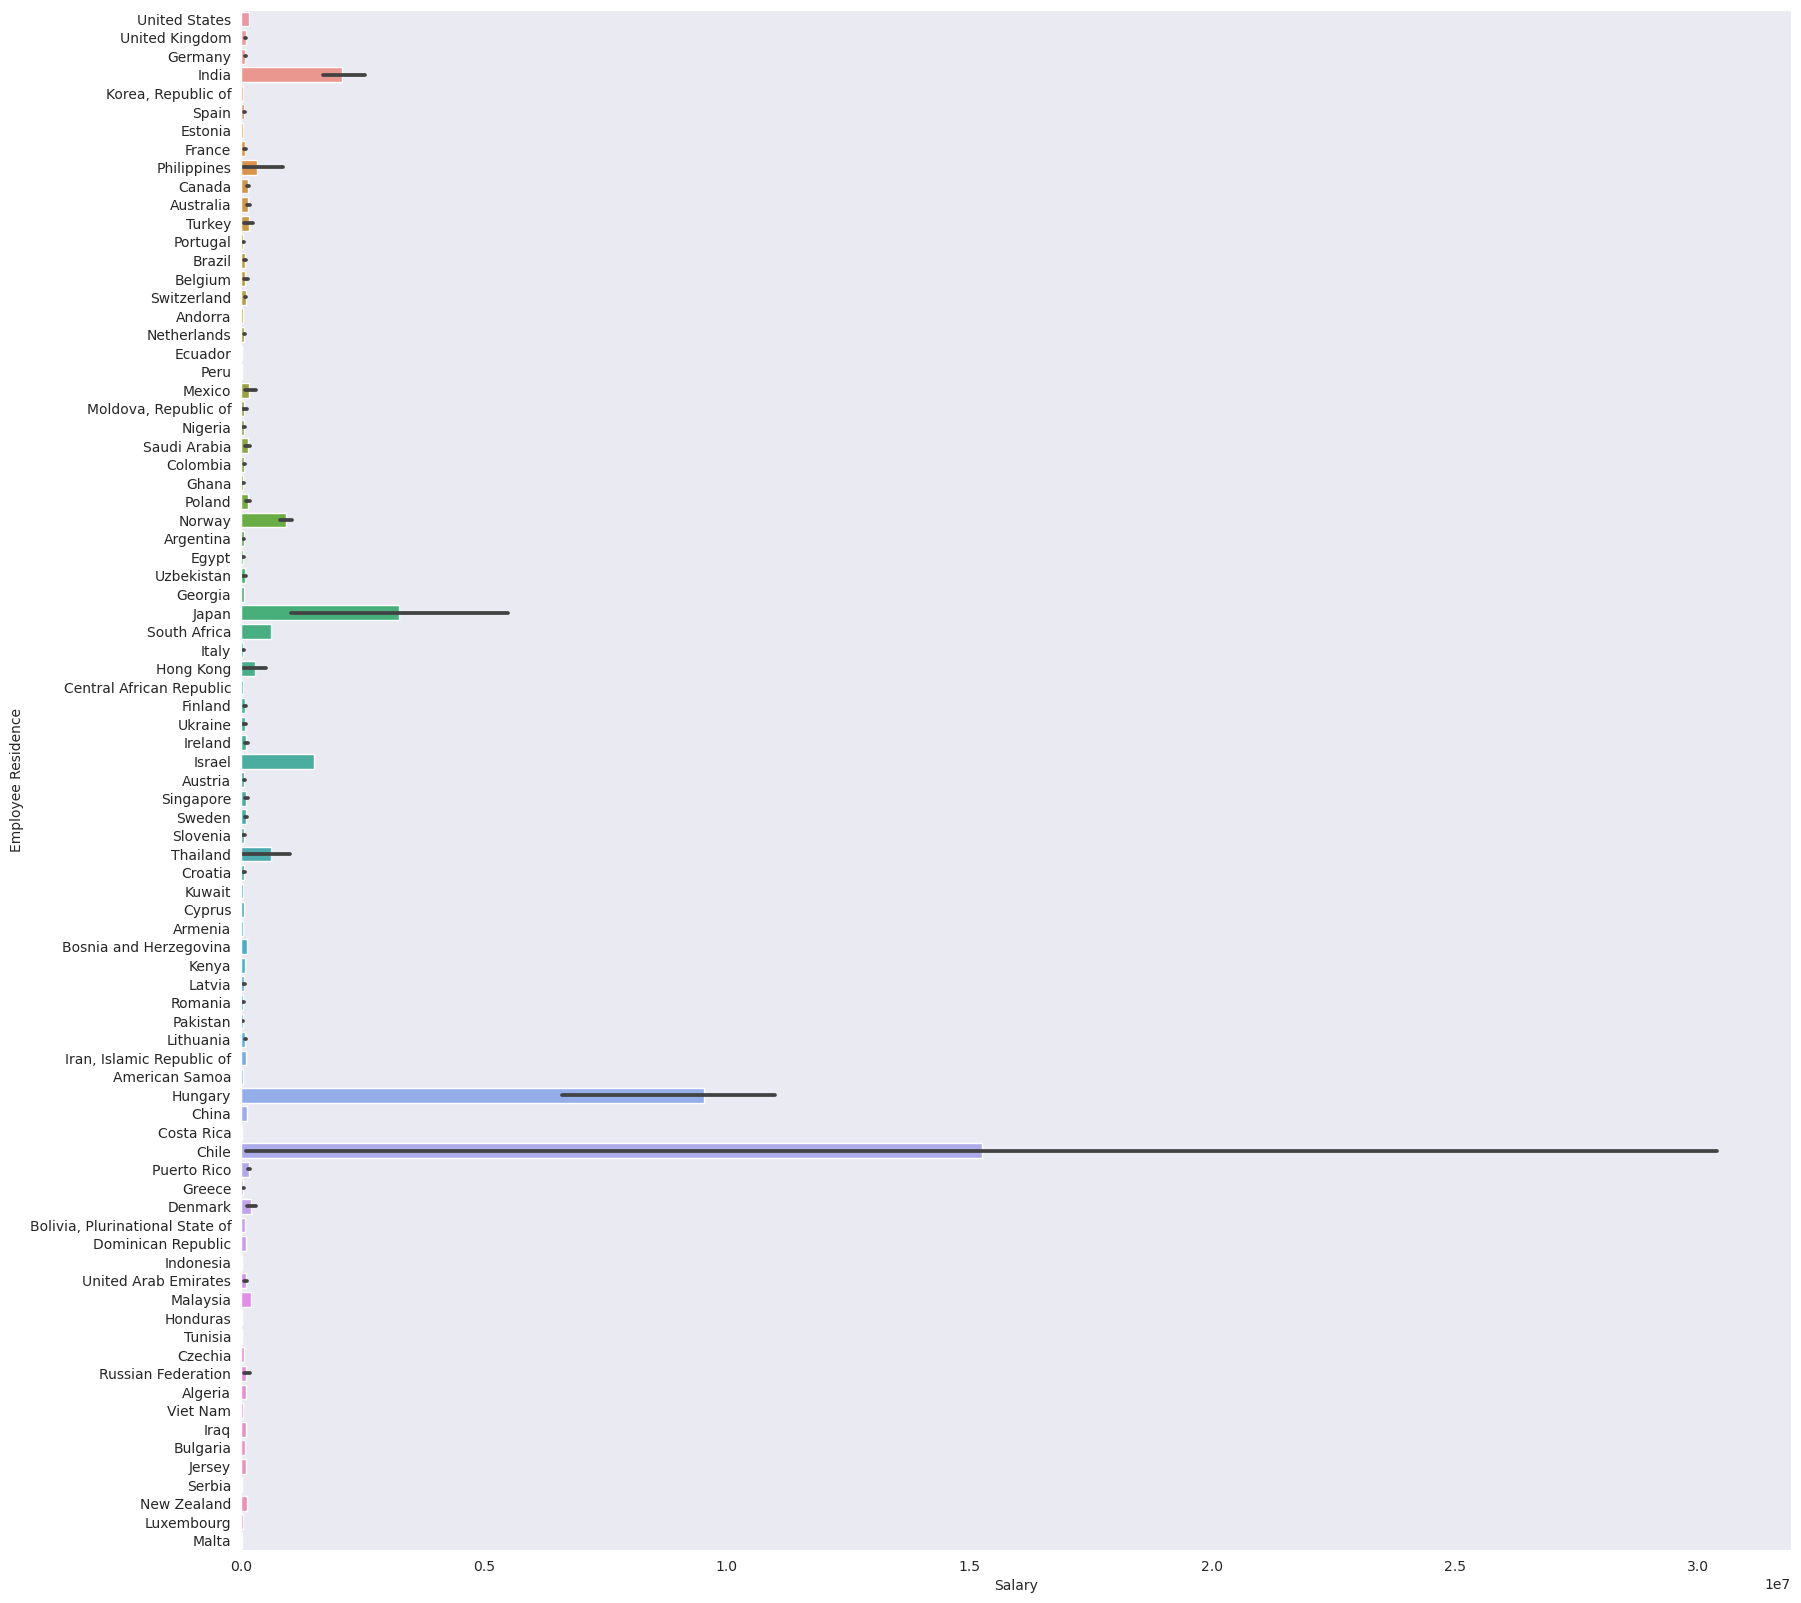

In [15]:
plt.figure(figsize=(20,20))
sns.barplot(x=df['Salary'], y=df['Employee Residence'])

<Axes: xlabel='Salary', ylabel='Count'>

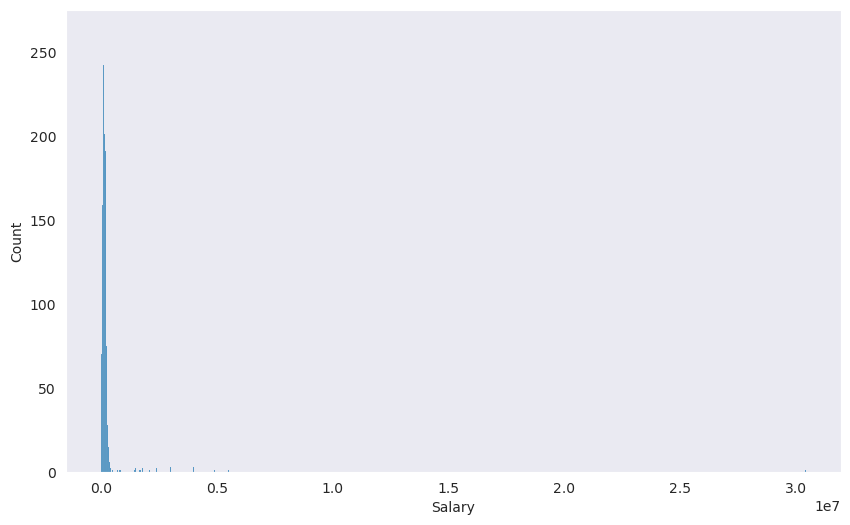

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'])

<Axes: xlabel='Salary', ylabel='Job Title'>

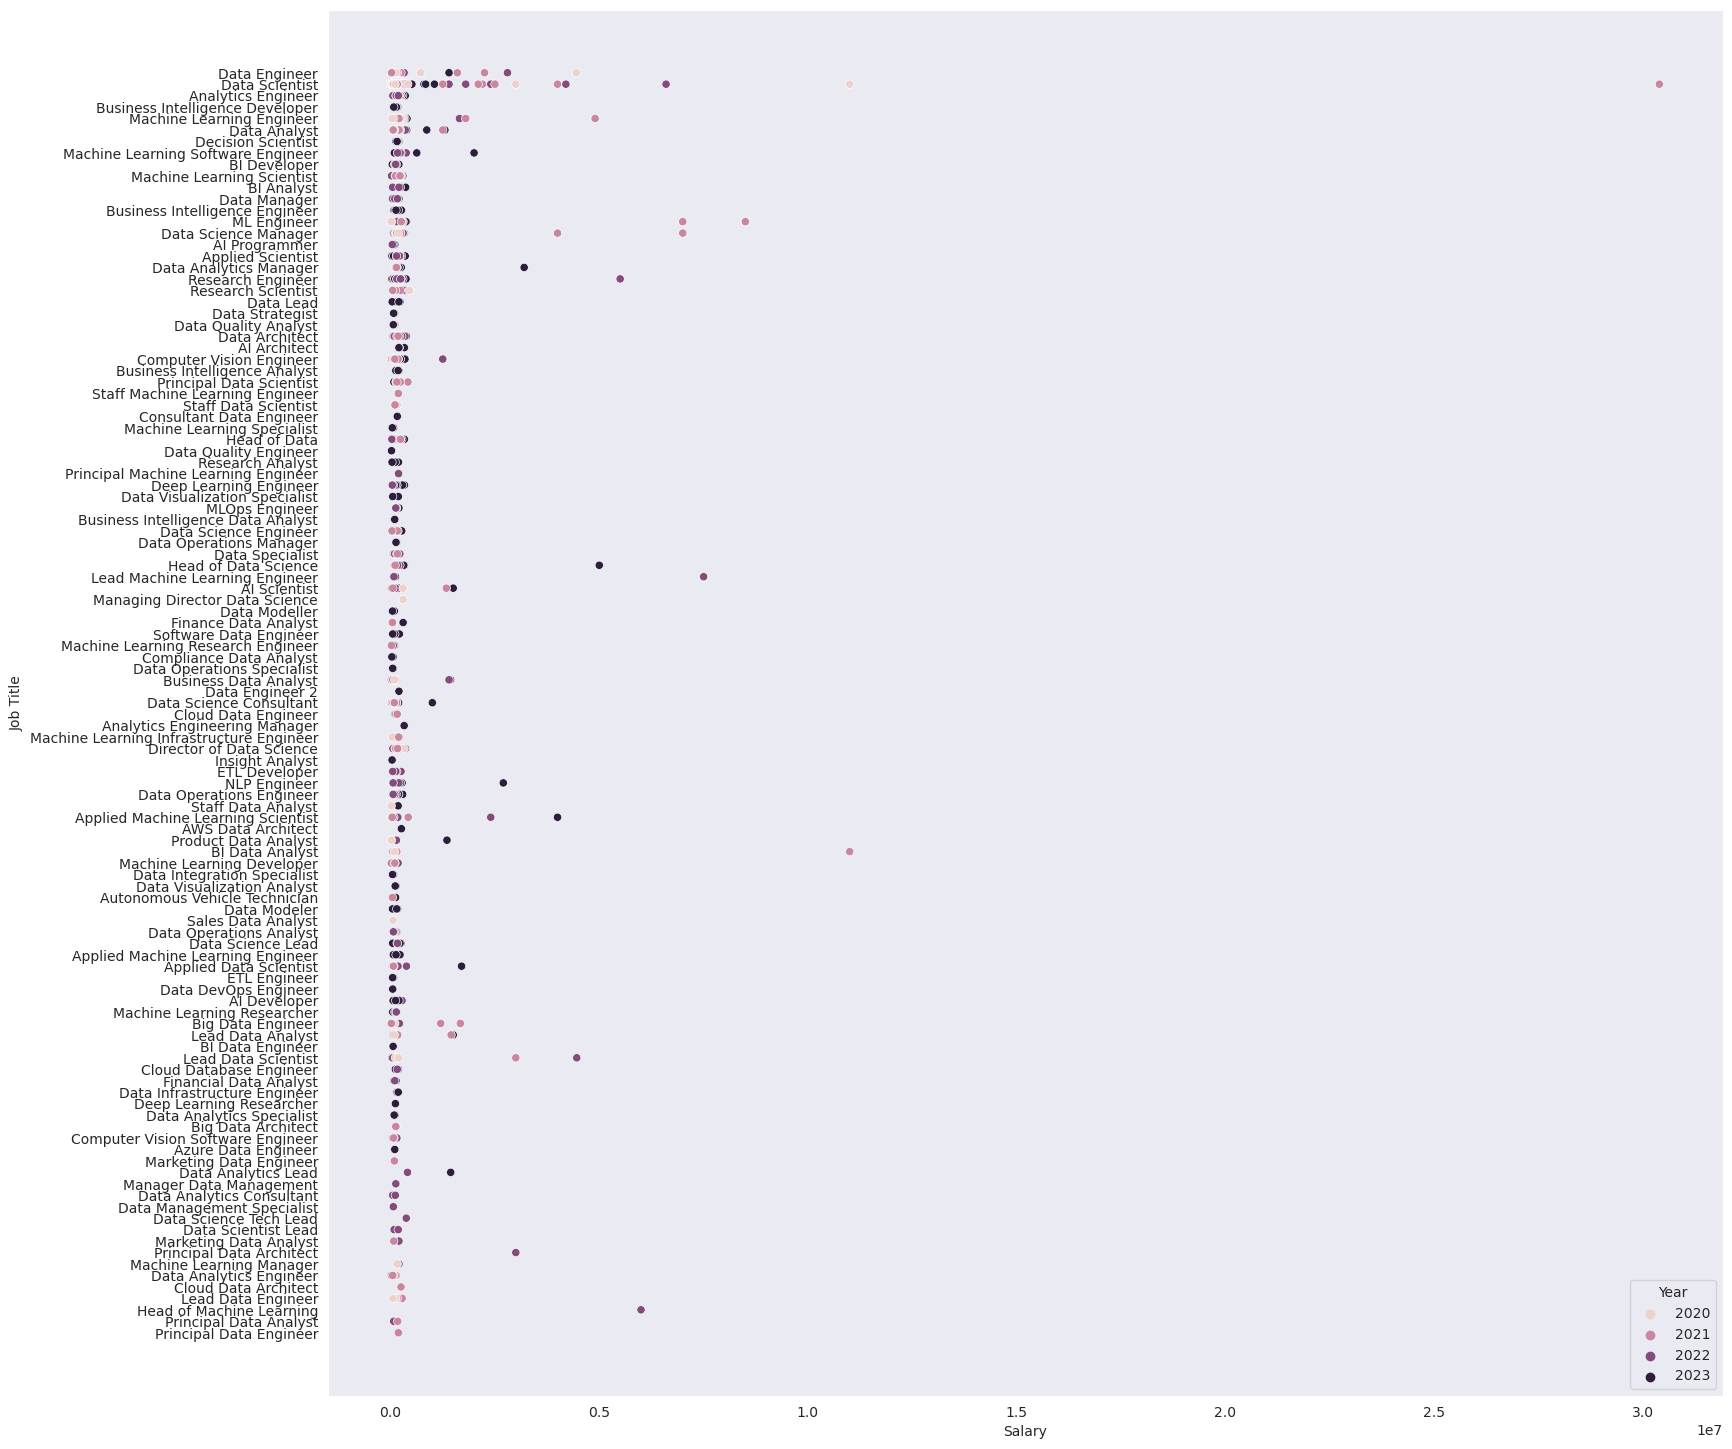

In [17]:
plt.figure(figsize=(18,18))
sns.scatterplot(x=df['Salary'], y=df['Job Title'], hue=df['Year'])

<Axes: xlabel='Salary', ylabel='Employee Residence'>

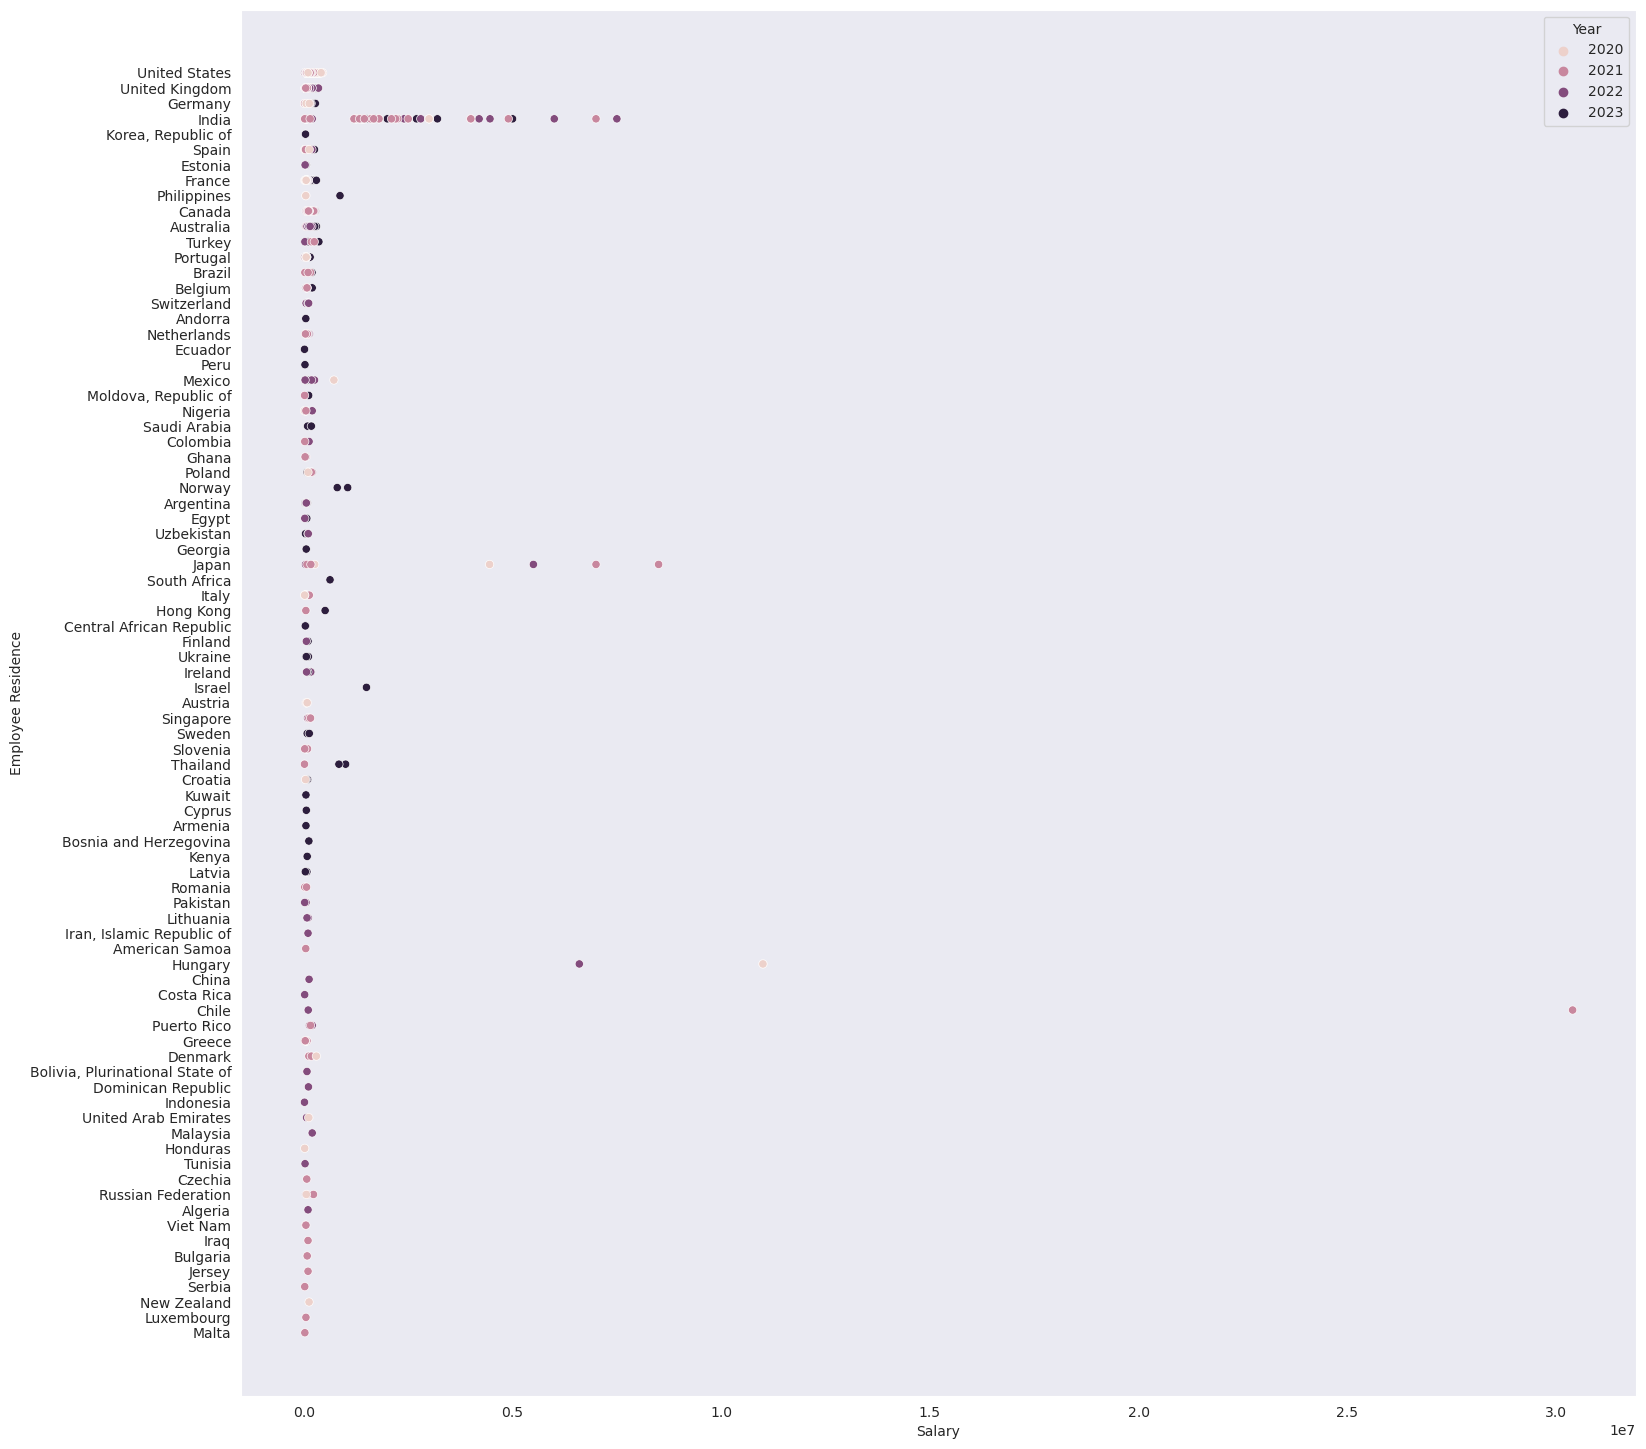

In [18]:
plt.figure(figsize=(18,18))
sns.scatterplot(x=df['Salary'], y=df['Employee Residence'], hue=df['Year'])

<Axes: xlabel='Salary', ylabel='Year'>

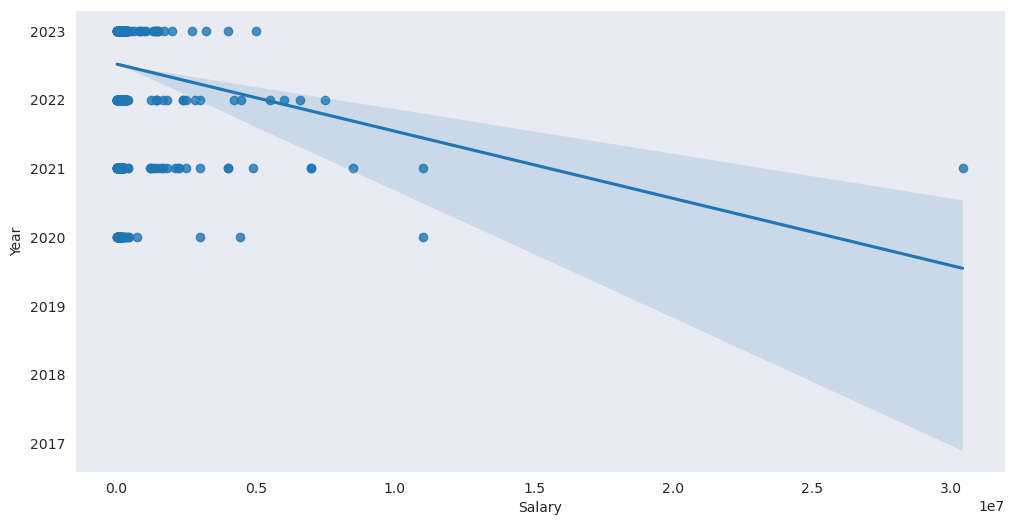

In [19]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['Salary'], y=df['Year'])

<Axes: xlabel='Year', ylabel='Salary'>

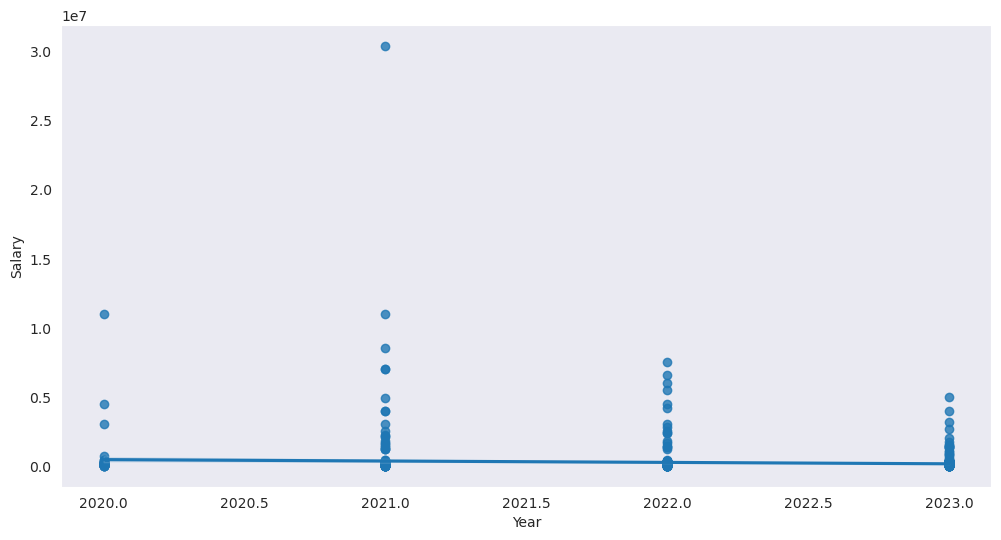

In [20]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['Year'], y=df['Salary'])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

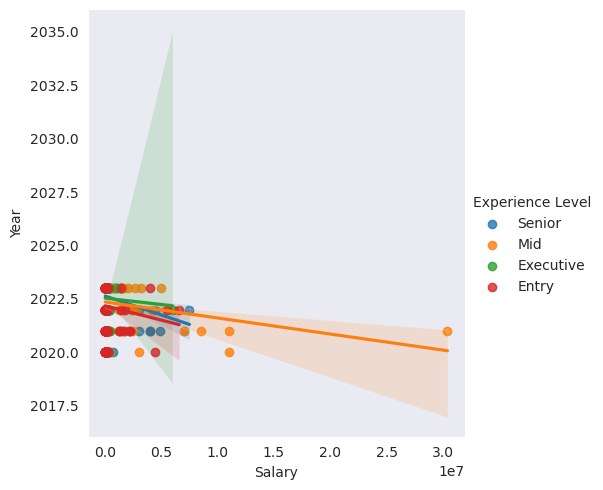

In [21]:
plt.figure(figsize=(15,15))
sns.lmplot(x="Salary", y="Year", hue="Experience Level", data=df)

In [22]:
df_num_corr = df_num.corr()['Salary'][:-1] # -1 because the latest row is Sepal length
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Salary:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Salary:
Salary    1.0
Name: Salary, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


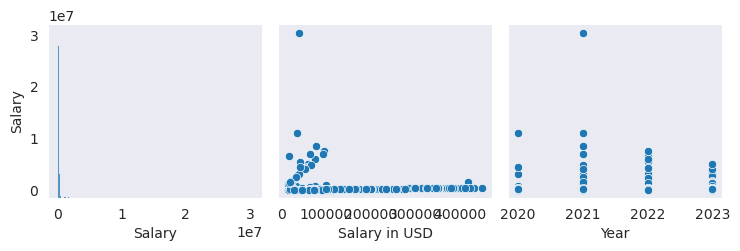

In [23]:
for i in range(0, len(df_num.columns), 3):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+3],
                y_vars=['Salary'])

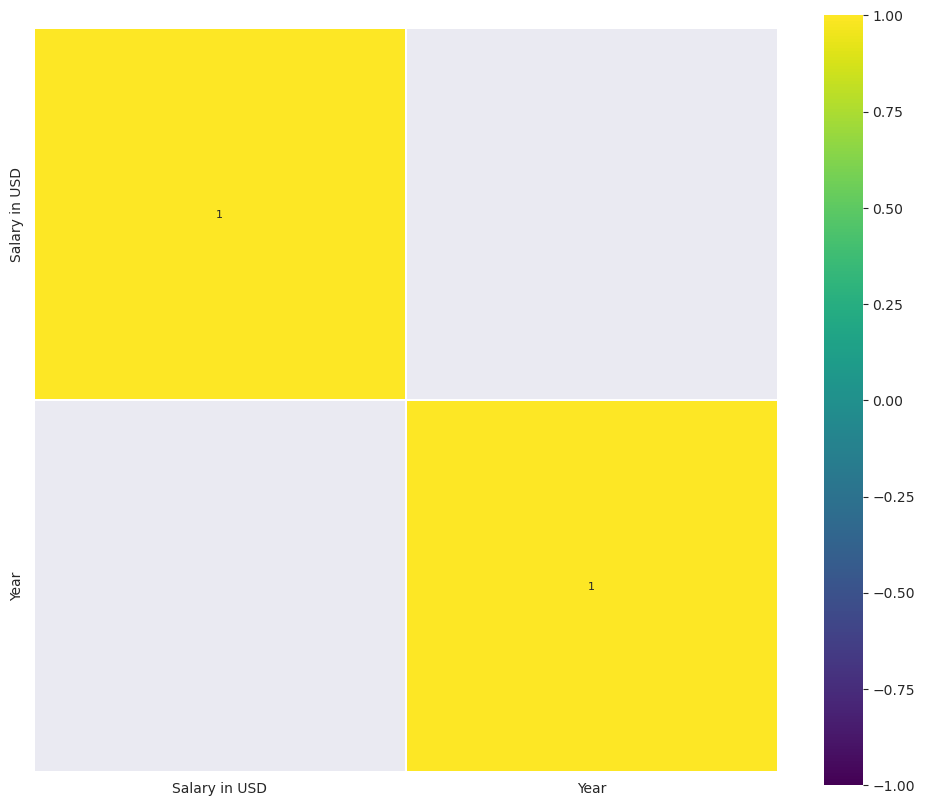

In [24]:
corr = df_num.drop('Salary', axis=1).corr() # We already examined sepal length correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

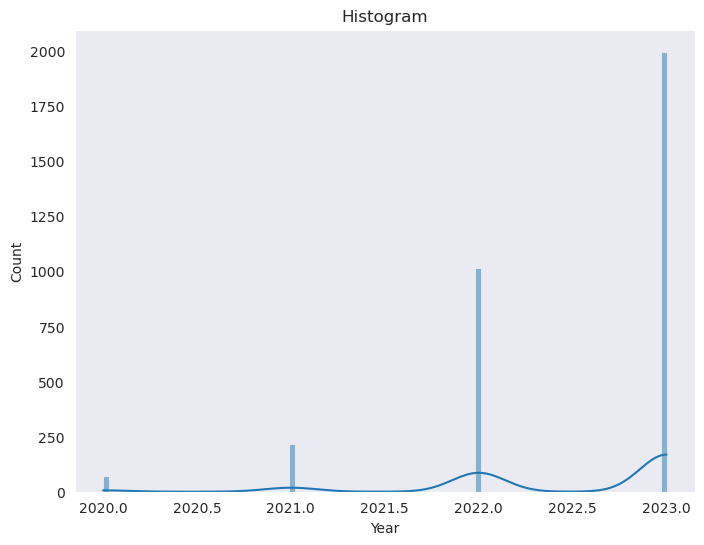

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Year', bins=100, kde=True)
plt.title("Histogram")
plt.show()

/tmp/ipykernel_20/3308045583.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


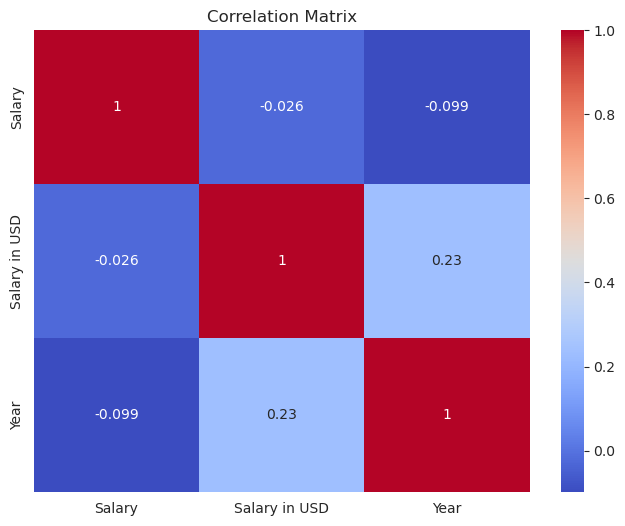

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

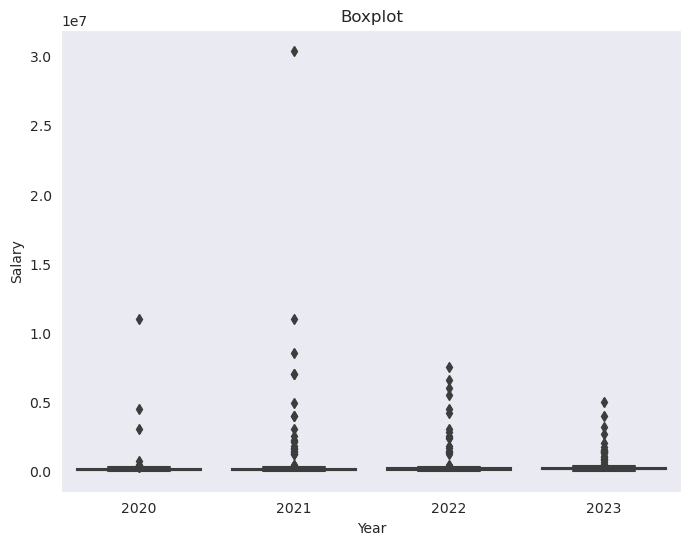

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='Year', y='Salary')
plt.title("Boxplot")
plt.show()

In [28]:
quantitative_features_list = ['Salary', 'Salary in USD', 'Year']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,Salary,Salary in USD,Year
0,210000,210000,2023
1,165000,165000,2023
2,185900,185900,2023
3,129300,129300,2023
4,140000,140000,2023


In [29]:
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary Currency,Company Location,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium,2023


In [30]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 8 non numerical features including:
['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level', 'Salary Currency', 'Company Location', 'Employee Residence', 'Company Size']


/tmp/ipykernel_20/894143277.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_20/894143277.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_20/894143277.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_20/894143277.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_20/894143277.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_20/894143277.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xtickla

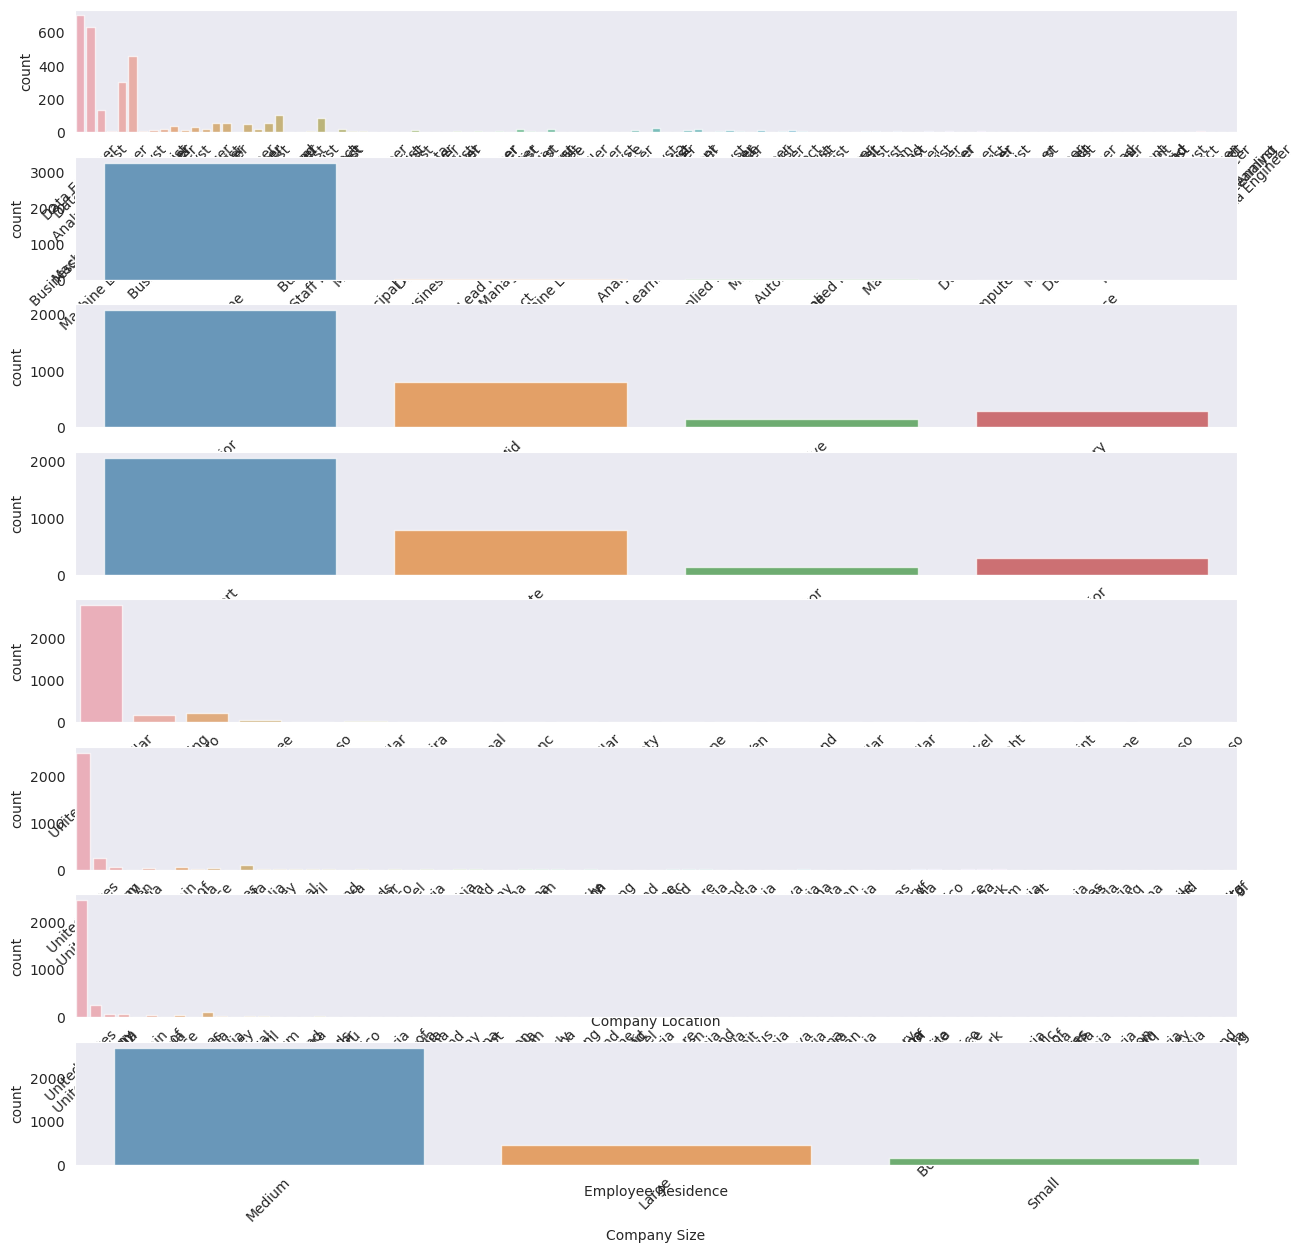

In [31]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 1), 1, figsize=(15, 15))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

In [32]:
df = df.dropna()
df.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

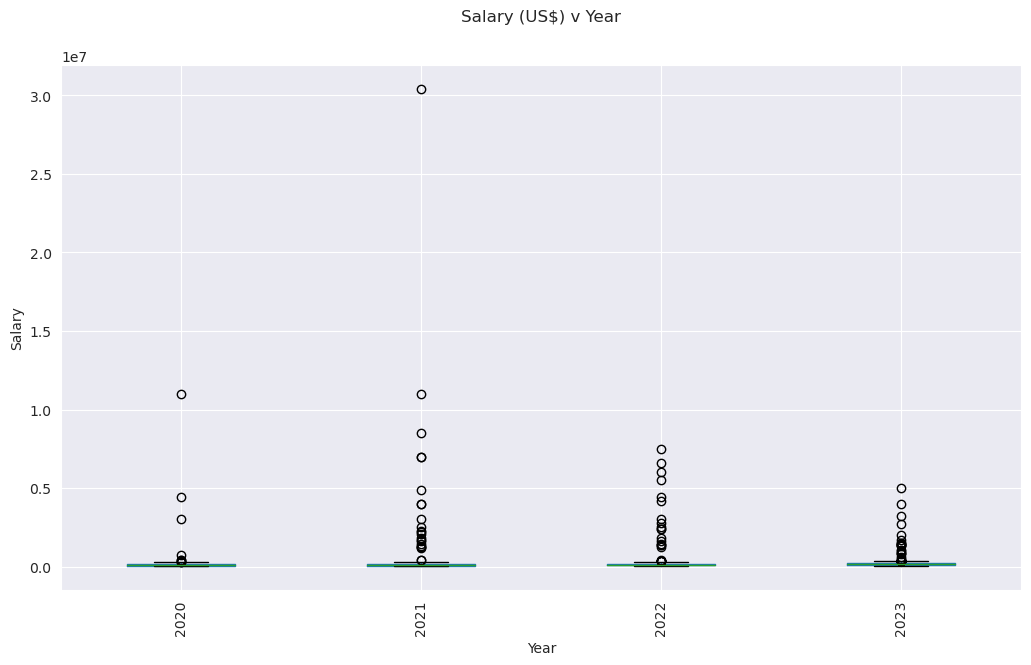

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Year', ax=ax)
plt.suptitle('Salary (US$) v Year')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

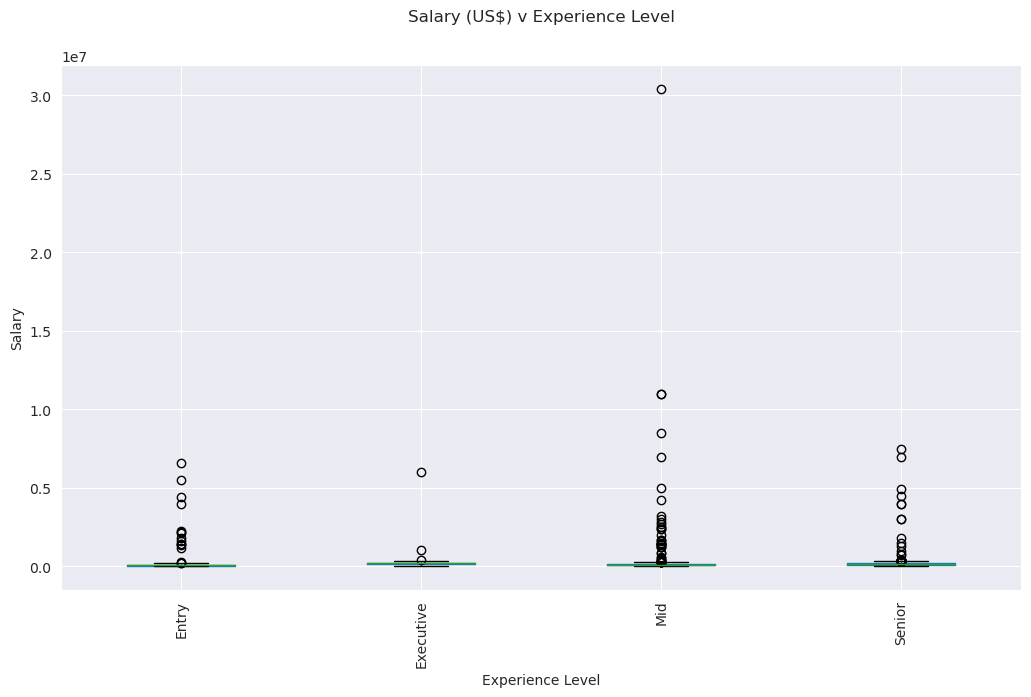

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Experience Level', ax=ax)
plt.suptitle('Salary (US$) v Experience Level')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

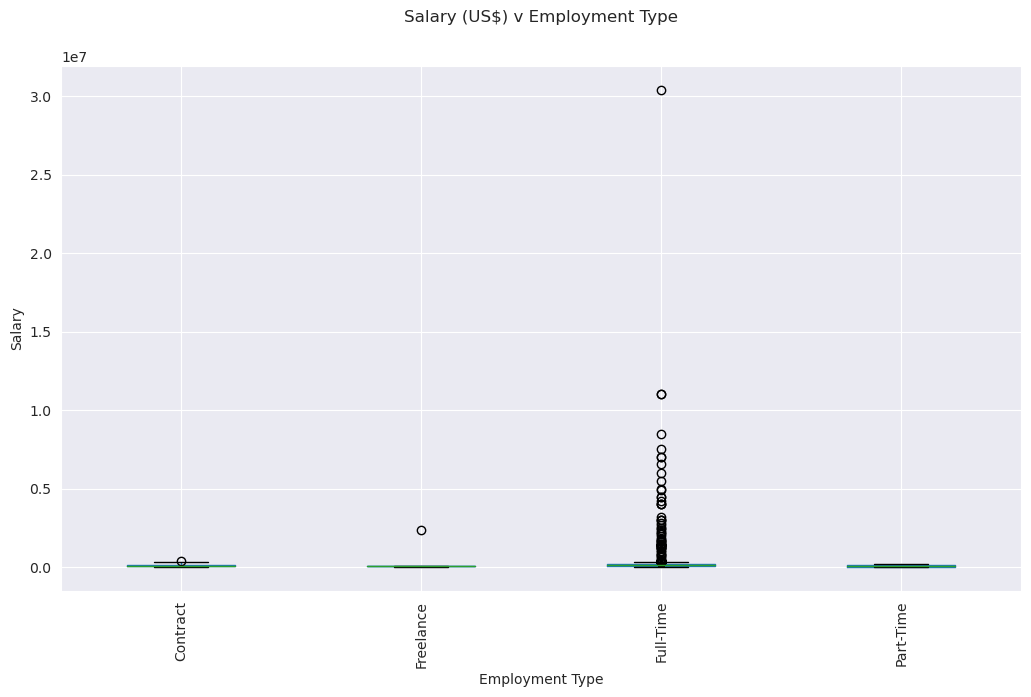

In [35]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Employment Type', ax=ax)
plt.suptitle('Salary (US$) v Employment Type')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

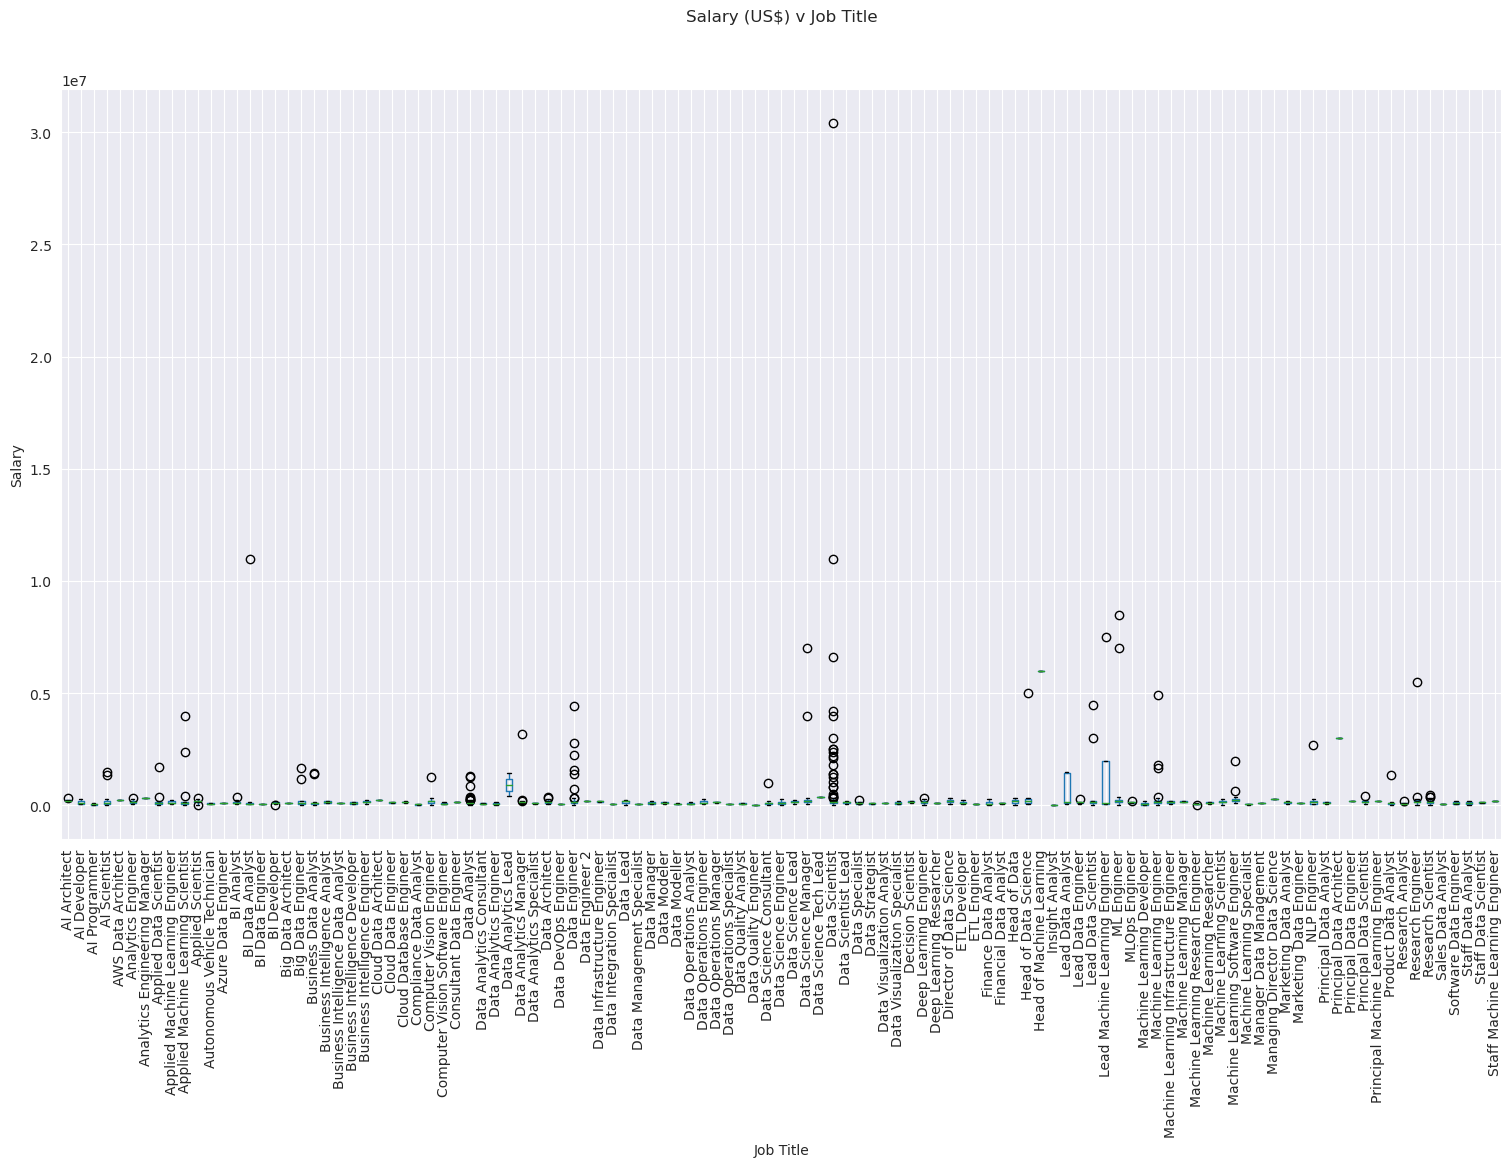

In [36]:
fig, ax = plt.subplots(1,1, figsize=(18, 10))
df.boxplot('Salary', 'Job Title', ax=ax)
plt.suptitle('Salary (US$) v Job Title')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()